100%|██████████| 1756/1756 [00:00<00:00, 156088.62it/s]

number of trades: 127



/Users/andrew/github/trading-strategies/ddd-southwest/common_functions.py:199: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  backtest = Backtest(data, MacdStrategy, cash=cash,
/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/8 [00:00<?, ?it/s]

Start                                  1456.0
End                                    1755.0
Duration                                299.0
Exposure Time [%]                        48.0
Equity Final [$]                  21754.22142
Equity Peak [$]                  22302.785848
Return [%]                           8.771107
Buy & Hold Return [%]               -2.480689
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                   -4.402616
Avg. Drawdown [%]                   -1.758324
Max. Drawdown Duration                  105.0
Avg. Drawdown Duration                   26.3
# Trades                                 20.0
Win Rate [%]                             55.0
Best Trade [%]                       1.371711
Worst Trade [%]                      -1.14237
Avg. Trade [%]                    

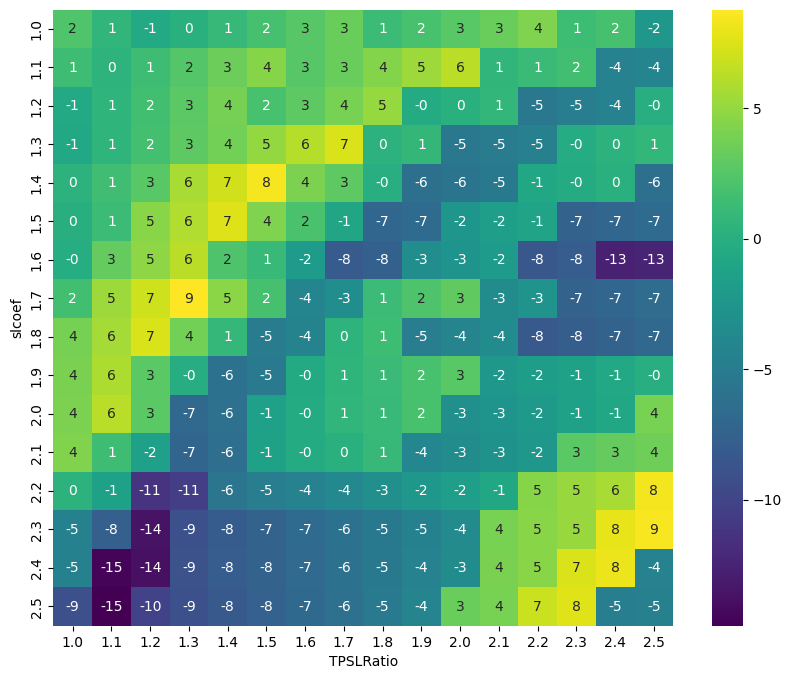

/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p1283', ...)

In [1]:
import common_functions as cf

symbol = '^IXIC'
period = '1y'
interval = '1h'

def total_trade_signal(row):
    if (row.MACD_trade_signal == 1):
        return 1
    elif (row.MACD_trade_signal == -1):
        return -1
    else:
        return 0

tradingData = cf.read_data(symbol, period, interval)
cf.set_indicators(tradingData, ema_length=200)
number_of_trades = cf.set_trade_signals(tradingData, total_trade_signal)

latest_data = tradingData.tail(300)
latest_data
backtest, stats, heatmap = cf.backtest_trading(latest_data, 20000)

print(stats)
cf.show_heatmap(heatmap)
backtest.plot()